K-means Clustering applied to BMI

In [51]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
import pandas as pd
 

In [52]:
df=pd.read_csv('df4.csv',sep=',',skipinitialspace=True)
df = df.drop('Unnamed: 0', axis=1)
display(df.head())


,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.1
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.6
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,36.0
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.4
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.6


In [53]:
# X = np.array([[1, 2], [1, 4], [1, 0],
#               [10, 2], [10, 4], [10, 0]])

df_kmeans = df[['lifespan','BMI']] 
scaled_kmeans = StandardScaler().fit_transform(df_kmeans)

df_scaled_kmeans = pd.DataFrame(scaled_kmeans)
df_scaled_kmeans.columns = ['lifespan','bmi']
df_scaled_kmeans.head()

,lifespan,bmi
0,-0.942257,0.187110
1,0.652787,0.966971
2,0.197060,1.014963
3,0.116638,1.662847
4,-0.687586,-0.592750


d:\0_Program_Files\Python3.10.1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.31476068e-15 2.81198506e-16]]


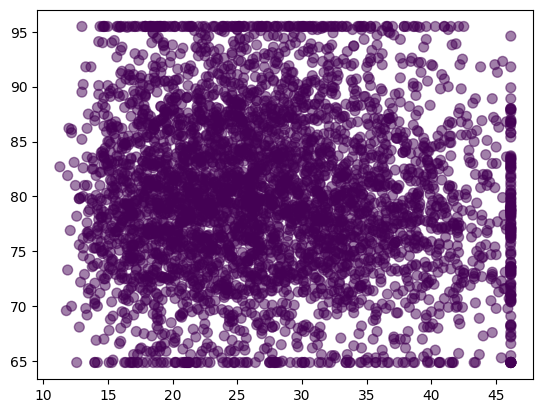

In [60]:
 #kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(df[['lifespan','BMI']])
kmeans = KMeans(n_clusters=1).fit(df_scaled_kmeans)
centroids = kmeans.cluster_centers_

print(centroids)

plt.scatter(df_kmeans['BMI'], df_kmeans['lifespan'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# plt.xlabel('BMI')
# plt.ylabel('lifespan')
# plt.scatter(df['BMI'], df['lifespan'], alpha = 0.1, s = 100, color='red')
# plt.title("Kmeans Scatterplot of BMI - Lifespan", fontsize=10)
# plt.scatter(clusters[:,0], clusters[:,1], s = 10000, alpha=0.30)

Find optimal amount of clusters using elbow-curve (SSD
>We can see that if K increases, average distortion will decrease. Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.
)

In [58]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [59]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hk = hopkins(df_scaled_kmeans)
print(hk)


0.6957454304730325


 A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0

d:\0_Program_Files\Python3.10.1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\0_Program_Files\Python3.10.1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\0_Program_Files\Python3.10.1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\0_Program_Files\Python3.10.1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\0_Program_Files\Python3.1

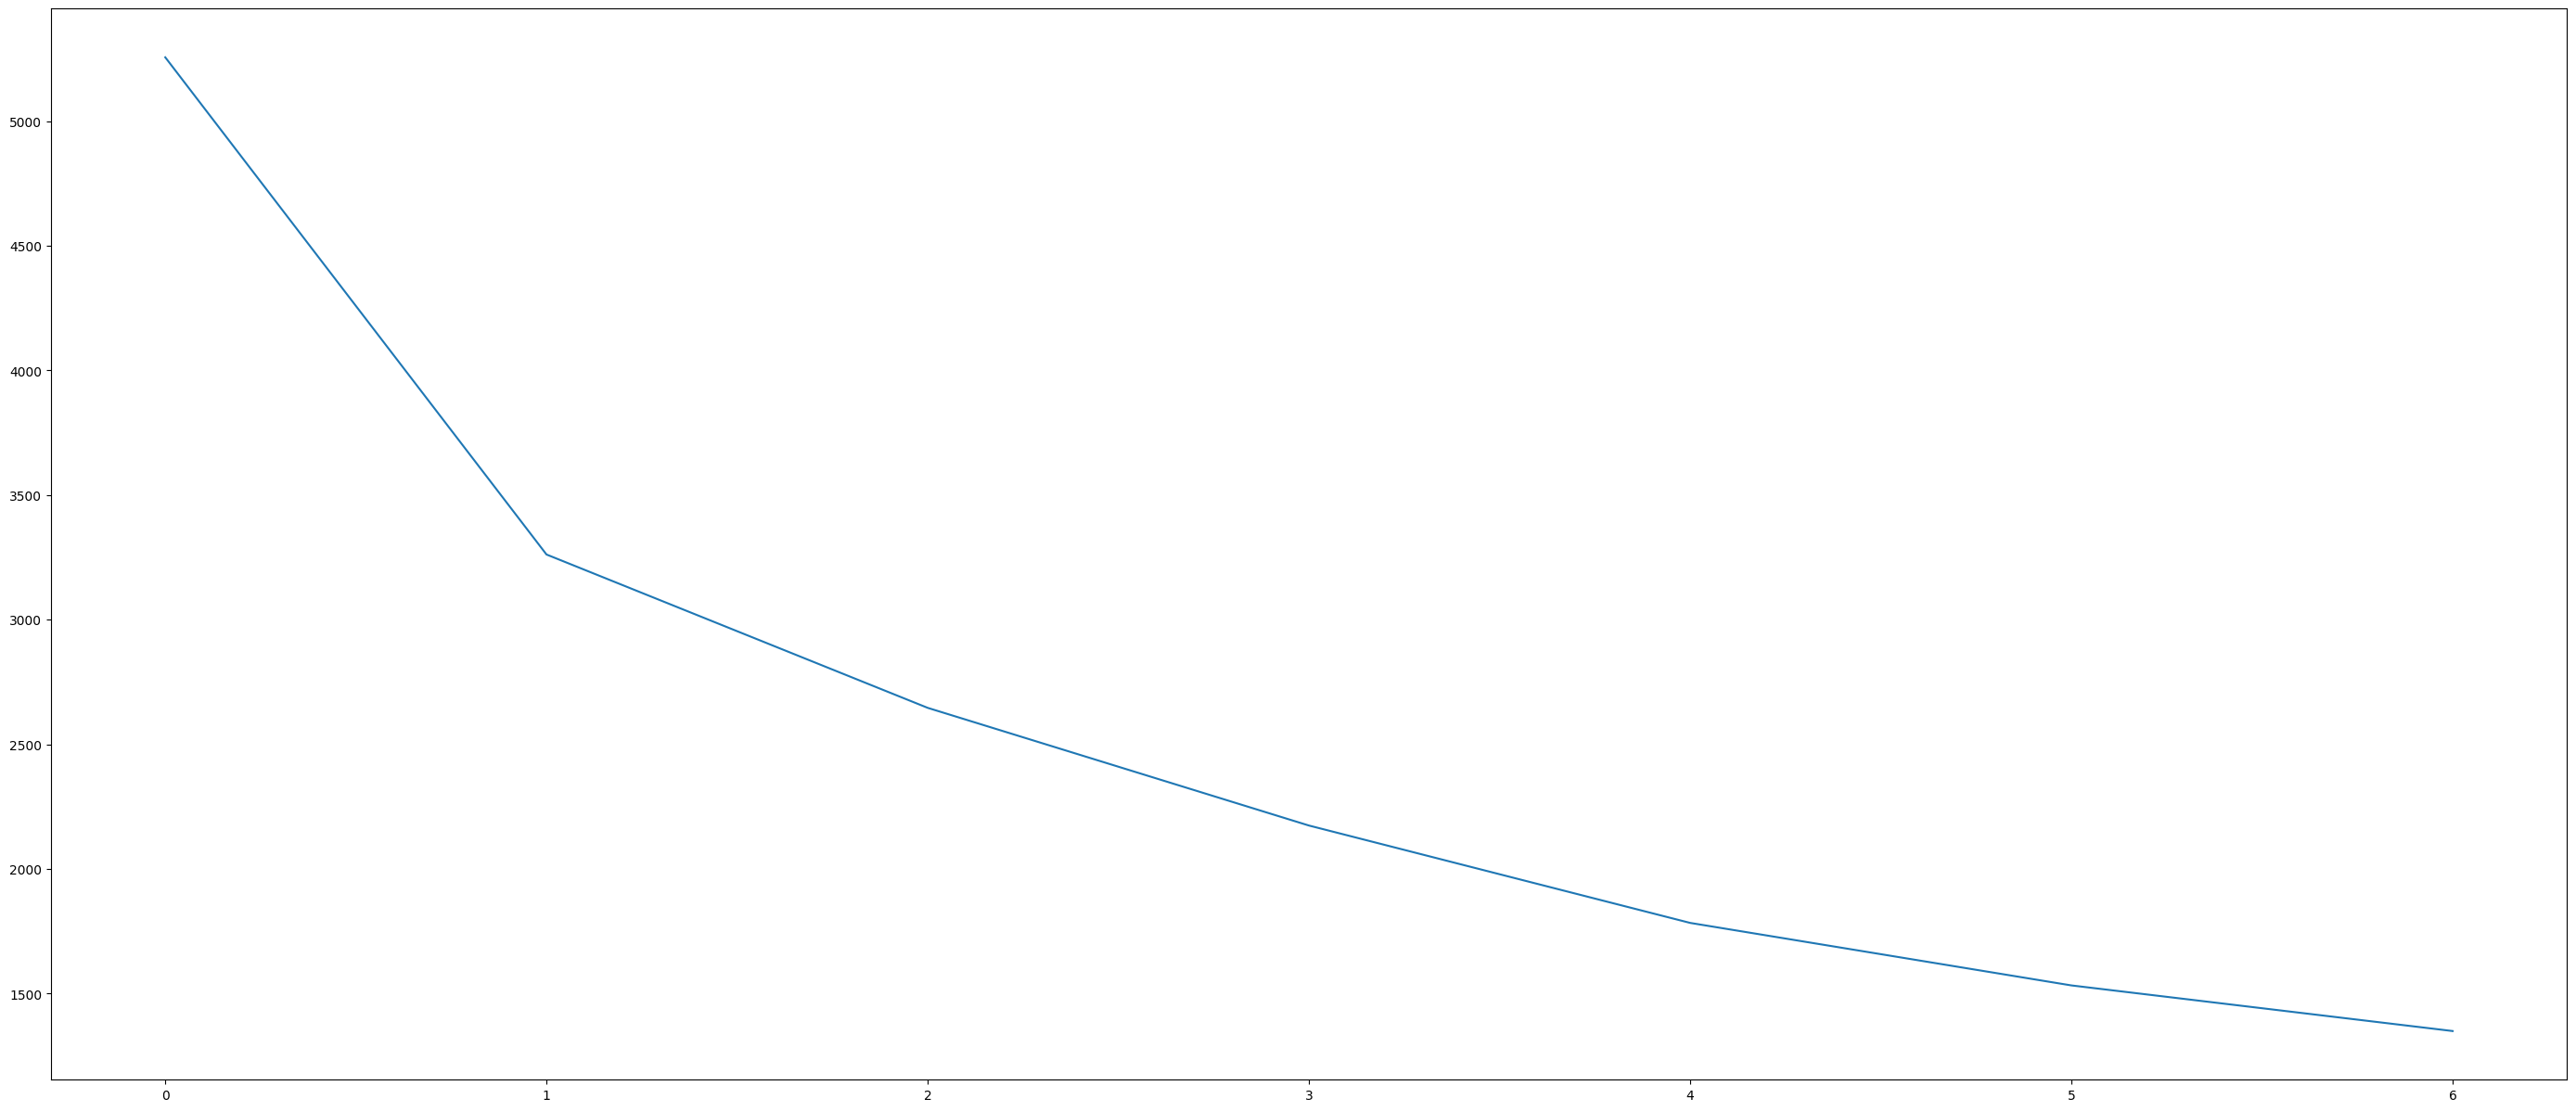

In [57]:
# elbow-curve/SSD
fig=plt.figure(figsize=(35,15))
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled_kmeans)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd);



We conclude based on the elbow method that 1 cluster is the optimum!